In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [2]:
df=pd.read_csv(r'C:\Users\matti\OneDrive\Desktop\Projects_Analysis\Super_Market\supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Study of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
#df['year'] = df['time'].dt.year
#df['month'] = df['time'].dt.month
#df['day'] = df['time'].dt.day
#df['hour'] = df['time'].dt.hour
#df['minute'] = df['time'].dt.minute
#df['second'] = df['time'].dt.second
#df['week'] = df['time'].dt.isocalendar().week

# Transform date from object into DateTime

In [5]:
#Format Date as date
df['Date']=pd.to_datetime(df['Date'],format='mixed')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#change format from mm-dd-yy in dd-mm-yy converting the date into string with dt.strftime
df['Date']=df['Date'].dt.strftime('%d-%m-%Y')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
 #converte again the string Date into datetime using Format='mixed' and dayfirst=True

df['Date']=pd.to_datetime(df['Date'],format='mixed',dayfirst=True)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [9]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

# Create a Department Column and link every product line to its own Department

In [10]:
# I want to create a new column to regrup the Product line into departments using a dictionary where index is the Product line and map() to create the new column

Departments={'Health and beauty':'Beauty&Food','Electronic accessories':'Electronics','Home and lifestyle':'Home','Sports and travel':'Fashion&Outdoor','Food and beverages':'Beauty&Food','Fashion accessories':'Fashion&Outdoor'}
df['departments']=df['Product line'].map(Departments)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,departments
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Beauty&Food
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Electronics
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Home
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Beauty&Food
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Fashion&Outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Beauty&Food
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Home
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Beauty&Food
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Home


In [11]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

# Change name of cities

In [12]:
#Change the name of the cities with Italian Cities
df.loc[df['City']=='Yangon','City']='Rome'
df.loc[df['City']=='Naypyitaw','City']='Milan'
df.loc[df['City']=='Mandalay','City']='Naples'
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,departments
0,750-67-8428,A,Rome,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Beauty&Food
1,226-31-3081,C,Milan,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Electronics
2,631-41-3108,A,Rome,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Home
3,123-19-1176,A,Rome,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Beauty&Food
4,373-73-7910,A,Rome,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Fashion&Outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Milan,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Beauty&Food
996,303-96-2227,B,Naples,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Home
997,727-02-1313,A,Rome,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Beauty&Food
998,347-56-2442,A,Rome,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Home


# Add more date columns

In [13]:
#I create 3 new column to extract from Date the year month and week
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.isocalendar().week
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,departments,Year,Month,Week
0,750-67-8428,A,Rome,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Beauty&Food,2019,1,1
1,226-31-3081,C,Milan,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,Electronics,2019,3,10
2,631-41-3108,A,Rome,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Home,2019,3,9
3,123-19-1176,A,Rome,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Beauty&Food,2019,1,4
4,373-73-7910,A,Rome,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Fashion&Outdoor,2019,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Milan,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Beauty&Food,2019,1,5
996,303-96-2227,B,Naples,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Home,2019,3,9
997,727-02-1313,A,Rome,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,Beauty&Food,2019,2,6
998,347-56-2442,A,Rome,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,Home,2019,2,8


# Creation of column share% of sales per Department

In [14]:
department_total=df.groupby(df['departments'])['Total'].sum().reset_index() #share sales per department
tot=department_total['Total'].sum()
department_total['Share']=department_total['Total']/tot
department_total


,departments,Total,Share
0,Beauty&Food,105338.5830,0.326159
1,Electronics,54337.5315,0.168245
2,Fashion&Outdoor,109428.7215,0.338823
3,Home,53861.9130,0.166772


# Discover weekly trend of Departments 

c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\matti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

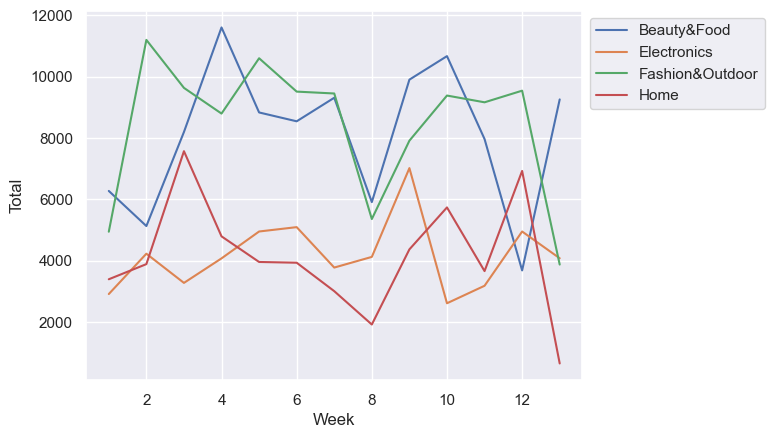

In [15]:
#Weekly sales per Department
df1=df.groupby(['departments','Week'])['Total'].sum().reset_index()
sns.set(style='darkgrid') 
fig=sns.lineplot(data=df1,y='Total',x='Week',hue='departments')
plt.legend(fontsize='8')
sns.move_legend(fig,"upper left", bbox_to_anchor=(1, 1))

plt.show()

# Column Share of Sales per Department and Gender

In [16]:
df_gender=df.groupby(['departments','Gender'])['Total'].sum().reset_index() #group sales by gender and department 
department_total = df_gender.groupby('departments')['Total'].transform('sum') #Total sales grouped by department
df_gender['Share']=df_gender['Total']/department_total 
df_gender

,departments,Gender,Total,Share
0,Beauty&Food,Female,51731.9040,0.491101
1,Beauty&Food,Male,53606.6790,0.508899
2,Electronics,Female,27102.0225,0.498772
3,Electronics,Male,27235.5090,0.501228
4,Fashion&Outdoor,Female,59012.1210,0.539275
5,Fashion&Outdoor,Male,50416.6005,0.460725
6,Home,Female,30036.8775,0.557665
7,Home,Male,23825.0355,0.442335


# Sales by Gender in each Department

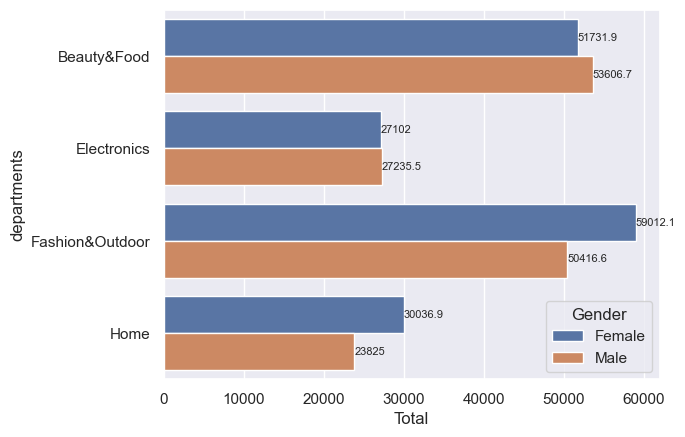

In [17]:
plot=sns.barplot(x='Total',y='departments',hue='Gender',data=df_gender)
plot.bar_label(plot.containers[0], fontsize=8)
plot.bar_label(plot.containers[1], fontsize=8)
plt.show()

# Sales share per Department Gender and City

In [18]:
#calculation of the share per gender in each department per each city creating 2 dataframes and merging them
df_analysis_city=df.groupby(['City','Gender','departments'])['Total'].sum().reset_index()
df_gender_total=df.groupby(['City','departments'])['Total'].sum().reset_index()
df_analysis=df_analysis_city.merge(df_gender_total,on=['City','departments'],suffixes=('','_Total'))
 #we use in this case a merge on city and departments and applying suffix allow to create add the column total of the secon df
 #to the first df adding the 2 names and creating a new column Total_Total since we cannot have 2 columns with the same name
df_analysis['Share']=df_analysis['Total']/df_analysis['Total_Total']
df_analysis



,City,Gender,departments,Total,Total_Total,Share
0,Milan,Female,Beauty&Food,22106.8995,40382.1810,0.547442
1,Milan,Female,Electronics,8969.2155,18968.9745,0.472836
2,Milan,Female,Fashion&Outdoor,22766.4150,37321.9980,0.610000
3,Milan,Female,Home,7842.9330,13895.5530,0.564420
4,Milan,Male,Beauty&Food,18275.2815,40382.1810,0.452558
5,Milan,Male,Electronics,9999.7590,18968.9745,0.527164
6,Milan,Male,Fashion&Outdoor,14555.5830,37321.9980,0.390000
7,Milan,Male,Home,6052.6200,13895.5530,0.435580
8,Naples,Female,Beauty&Food,16910.3445,35195.5485,0.480468
9,Naples,Female,Electronics,8166.5115,17051.4435,0.478934


# Total sales by gender in each City

c:\Users\matti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\matti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\matti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


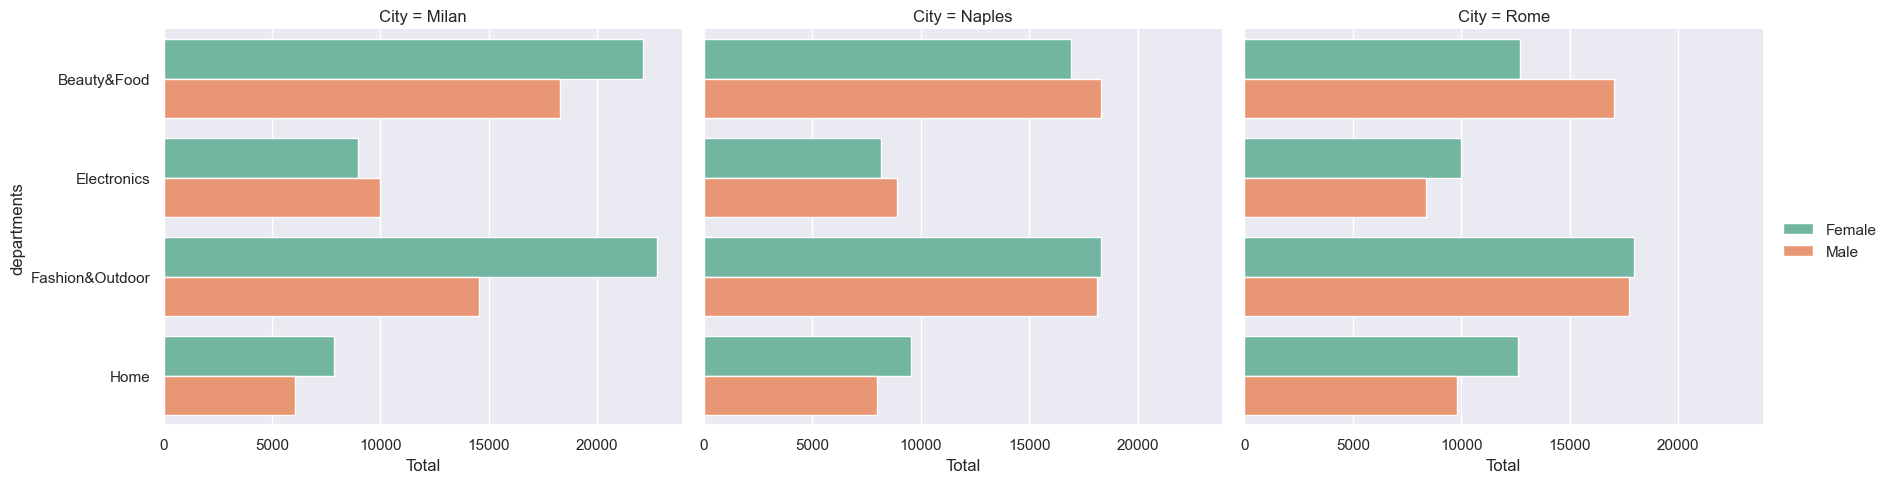

In [19]:
#Plot of a chart to compare Total per departments and gender in each city
g=sns.FacetGrid(df_analysis,col='City',height=5,aspect=1.2)
g.map_dataframe(sns.barplot,x='Total',y='departments',hue='Gender',ci=None,palette='Set2')
g.add_legend()

plt.show()


In [20]:
df.groupby(['City'])['Customer type'].value_counts().reset_index()

,City,Customer type,count
0,Milan,Member,169
1,Milan,Normal,159
2,Naples,Normal,167
3,Naples,Member,165
4,Rome,Normal,173
5,Rome,Member,167


# Proportion of Customer Members and Not per Department

In [21]:
#Membership Analysis per department 
df.groupby(['departments'])['Customer type'].value_counts(normalize=True).reset_index()

,departments,Customer type,proportion
0,Beauty&Food,Member,0.512270
1,Beauty&Food,Normal,0.487730
2,Electronics,Normal,0.541176
3,Electronics,Member,0.458824
4,Fashion&Outdoor,Member,0.502907
5,Fashion&Outdoor,Normal,0.497093
6,Home,Member,0.518750
7,Home,Normal,0.481250


# Proportion of Payment Type 

In [22]:
#Payment Method analysis
df['Payment'].value_counts(normalize=True).reset_index()

,Payment,proportion
0,Ewallet,0.345
1,Cash,0.344
2,Credit card,0.311


# Proportion of Payment type in each city

In [23]:
df_payment=df.groupby(['City'])['Payment'].value_counts(normalize=True).reset_index()
df_payment

,City,Payment,proportion
0,Milan,Cash,0.378049
1,Milan,Ewallet,0.323171
2,Milan,Credit card,0.298780
3,Naples,Ewallet,0.340361
4,Naples,Cash,0.331325
5,Naples,Credit card,0.328313
6,Rome,Ewallet,0.370588
7,Rome,Cash,0.323529
8,Rome,Credit card,0.305882


# Proportion of different Payment type per Member and Not Memeber

In [35]:
df_payment_member=df.groupby(['Customer type'])['Payment'].value_counts(normalize=True)
df_payment_member

Customer type  Payment    
Member         Credit card    0.343313
               Cash           0.335329
               Ewallet        0.321357
Normal         Ewallet        0.368737
               Cash           0.352705
               Credit card    0.278557
Name: proportion, dtype: float64

# Regression Analysis 

**Correlation between quantities sold and sales generated aiming to have a more accurate forecast of sales starting from an increment of decrement of quantities**

In [25]:
df3=df.groupby('Week')[['Total','Quantity']].sum()
df3

,Total,Quantity
Week,,
1,17543.3895,305
2,24461.1990,431
3,28693.3605,461
4,29286.8835,489
5,28360.4475,484
6,27101.8335,506
7,25563.5940,399
8,17328.6645,314
9,29219.7150,465


In [61]:
#What is the weekly growth of Qty sold?

df3['Weekly_Gap']=df3['Quantity'].diff()
df3['Weekly_Growth']=df3['Weekly_Gap']/df3['Quantity']
df3

,Total,Quantity,Weekly_Growth,Weekly_Gap
Week,,,,
1,17543.3895,305,NaN,NaN
2,24461.1990,431,0.292343,126.0
3,28693.3605,461,0.065076,30.0
4,29286.8835,489,0.057260,28.0
5,28360.4475,484,-0.010331,-5.0
6,27101.8335,506,0.043478,22.0
7,25563.5940,399,-0.268170,-107.0
8,17328.6645,314,-0.270701,-85.0
9,29219.7150,465,0.324731,151.0


In [63]:
# Average Growth during the last 4 weeks
df3.loc[8:]['Weekly_Growth'].mean()

-0.06862131826443996

In [26]:
df_Sales_superMarket=df.to_csv(r'C:\Users\matti\OneDrive\Desktop\Projects_Analysis\Super_Market\Sales_analysis.csv')

# Knowing the quantity trend we can estimate our sales 

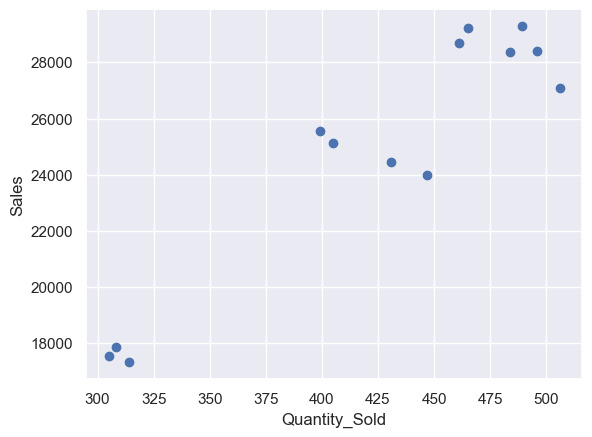

In [27]:
#Provare a determinare la variazione di Sales basandosi sulla variazione di unit sold con una regressione lineare semplice
#Si parte con uno scatter plot per capire che sorta di correlazione abbiamo tra la nostra feature(x) e la variabile dipendente(y)
plt.scatter(x='Quantity',y='Total',data=df3)
plt.xlabel('Quantity_Sold')
plt.ylabel('Sales')
plt.show()

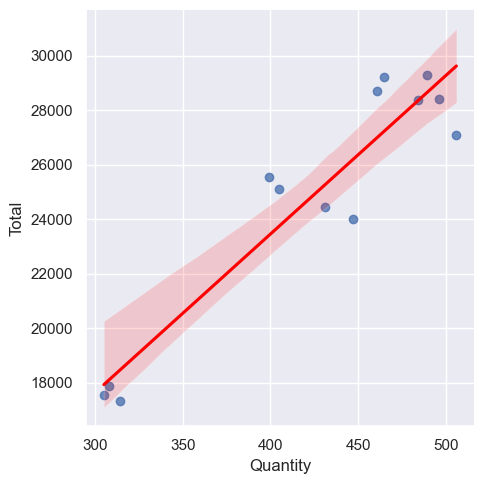

In [28]:
#Tracciamo una linea di regressione con un lmplot
sns.lmplot(
    data=df3,
    x= 'Quantity',
    y= 'Total',
    line_kws={'color': 'red'}
)

In [29]:
def lin_reg(x,y):

    X_mean=np.mean(x)
    Y_mean=np.mean(y)

    X_mean_dev=[el-X_mean for el in x]
    Y_mean_dev=[el-Y_mean for el in y]

    XY_covar=np.sum(np.array(X_mean_dev)*np.array(Y_mean_dev))
    X_var=np.sum(np.array(X_mean_dev)**2)

    b1=XY_covar/X_var
    b0=Y_mean-b1*X_mean

    return b0, b1



In [30]:
intercept,slope=lin_reg(df3['Quantity'],df3['Total'])
print('Intercept:',intercept)
print('Slope:',slope)

Intercept: 218.21599429173511
Slope: 58.09980781746051


In [36]:
import statsmodels.api as sm

In [37]:
df3.Quantity.corr(df3.Total)

0.9419648660810994

In [38]:
Y = df3['Total']
X = df3['Quantity']
X = sm.add_constant(X)   
model = sm.OLS(Y,X)
results = model.fit()

In [39]:
results.summary()

c:\Users\matti\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     86.60
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.51e-06
Time:                        14:47:33   Log-Likelihood:                -113.11
No. Observations:                  13   AIC:                             230.2
Df Residuals:                      11   BIC:                             231.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.2160   2682.221      0.081      0.937   -5685.312    6121.744
Quantity      58.0998      6.243      9.306      0.000      44.359      71.841
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   2.961
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.577
Skew:                          -0.079   Prob(JB):                        0.750
Kurtosis:                       1.980   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Main Consideration

**R-square of 88% indicates that the behaviour of Sales is explainable by the Behaviour of the quantity**

**F-Statistic of 86% indicates that our model is significant**

In [43]:
results_as_html= results.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df

c:\Users\matti\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\matti\AppData\Local\Temp\ipykernel_12360\1242778771.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]


,coef,std err,t,P>|t|,[0.025,0.975]
const,218.2160,2682.221,0.081,0.937,-5685.312,6121.744
Quantity,58.0998,6.243,9.306,0.000,44.359,71.841


In [64]:
pred=results.predict(np.array([1,286])) #Forecasted Sales per quantities sold equal to the average growth caluclated above
print('Estimated Sales Selling the predicted Quantities is:',pred)

Estimated Sales Selling the predicted Quantities is: [16834.76103009]


In [67]:
#confidence intervals
ci_lo = results_df['[0.025']['const'] + results_df['[0.025']['Quantity'] * 286
ci_hi = results_df['0.975]']['const'] + results_df['0.975]']['Quantity'] * 286
print('Confidence interval for estimate:', (ci_lo, ci_hi))

Confidence interval for estimate: (7001.362000000001, 26668.269999999997)


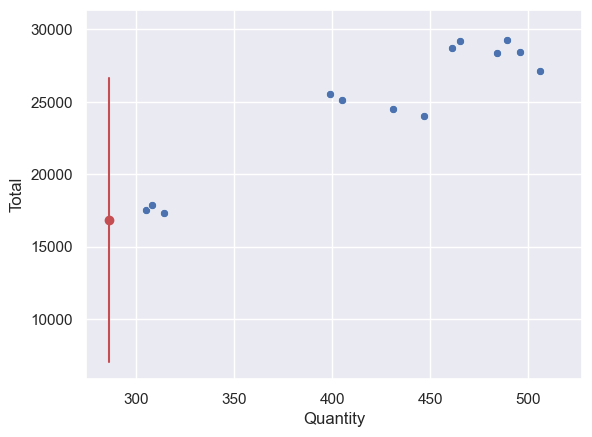

In [66]:
sns.scatterplot(x='Quantity',y='Total',data=df3)

axes=plt.gca()
x_vals=np.array([axes.get_xlim()])
y_vals=intercept + (slope * x_vals)

plt.plot(286, pred[0], 'ro')
plt.plot((286, 286), (ci_lo, ci_hi), 'r') # plotting the confidence interval

plt.plot(x_vals, y_vals, '--', color='m')

plt.show()

# Considering a trend of Quantities sold  during the past 4 weeks equal to a -7% we can assume that our forecast would be around 17000 for the next week